In [30]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('e3sm_diags_git_files.csv', names=['commit_hash'])

## Parse dataframe

In [4]:
df.commit_hash = df.commit_hash.str.replace('  ', ' ')

In [14]:
df_new = pd.DataFrame()
df_new[['hash', 'bytes', 'file']] = df['commit_hash'].str.split(n=2, expand=True)
df_new = df_new.drop_duplicates(subset=['file'])

df_new['bytes'] = df_new['bytes'].str.replace('B','').astype(int)
df_new['file_extension'] = df_new.file.str.rsplit('.', 1).str[-1]

## Aggregate dataframe

In [17]:
# Get the total file count by file extension
df_agg_ext_count = df_new.value_counts(subset=['file_extension']).reset_index()
df_agg_ext_count.columns = ['file_extension', 'counts']

# Get the total file size in mb by file extension
df_agg_ext_size = df_new.groupby('file_extension').agg({'bytes': 'sum'}).reset_index()
df_agg_ext_size['mb'] = df_agg_extension_size['bytes'] / 1000000

## Final Output

In [49]:
df_agg_final = pd.merge(df_agg_ext_count, df_agg_ext_size, how='left', on= ['file_extension']).reset_index()
df_agg_final = df_agg_final.sort_values('file_extension')

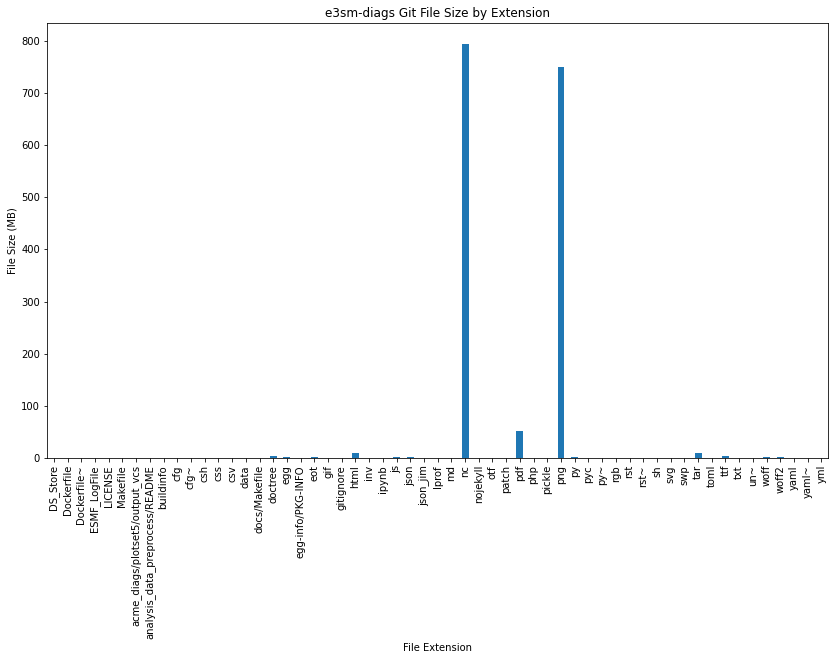

In [51]:
plot = df_agg_final.plot(x='file_extension', y='mb', kind='bar', figsize=(14, 8), title='e3sm-diags Git File Size by Extension', legend=None)
plt.ylabel('File Size (MB)')
plt.xlabel('File Extension')

plt.xticks(rotation=90)
plt.xticks(rotation=90)
plt.show()